
#### 70000 images=60000 train + 10000 test
#### 28* 28 greyscale
### 10 target classes
## 0 => T-shirt/top
## 1 => Trouser
## 2 => Pullover
## 3 => Dress
## 4 => Coat
## 5 => Sandal
## 6 => Shirt
## 7 => Sneaker
## 8 => Bag
## 9 => Ankle boot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fashion_train=pd.read_csv('/Users/aarathisrinivasnadathur/Desktop/fashion-mnist_train.csv', sep=',')

In [3]:
fashion_test= pd.read_csv('/Users/aarathisrinivasnadathur/Desktop/fashion-mnist_test.csv', sep=',')

In [4]:
fashion_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_test.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [8]:
training=np.array(fashion_train, dtype='float32')

In [9]:
testing=np.array(fashion_test, dtype='float32')

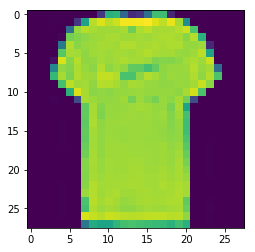

In [10]:
plt.imshow(training[10,1:].reshape(28,28))

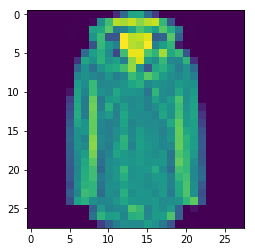

In [11]:
plt.imshow(training[22,1:].reshape(28,28))

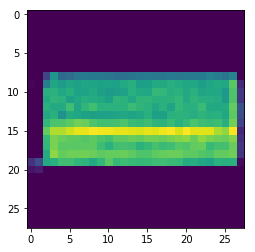

In [12]:
plt.imshow(training[1000,1:].reshape(28,28))

0.0

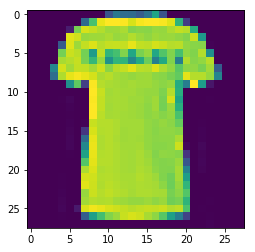

In [13]:
import random
i= random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label= training[i,0]
label

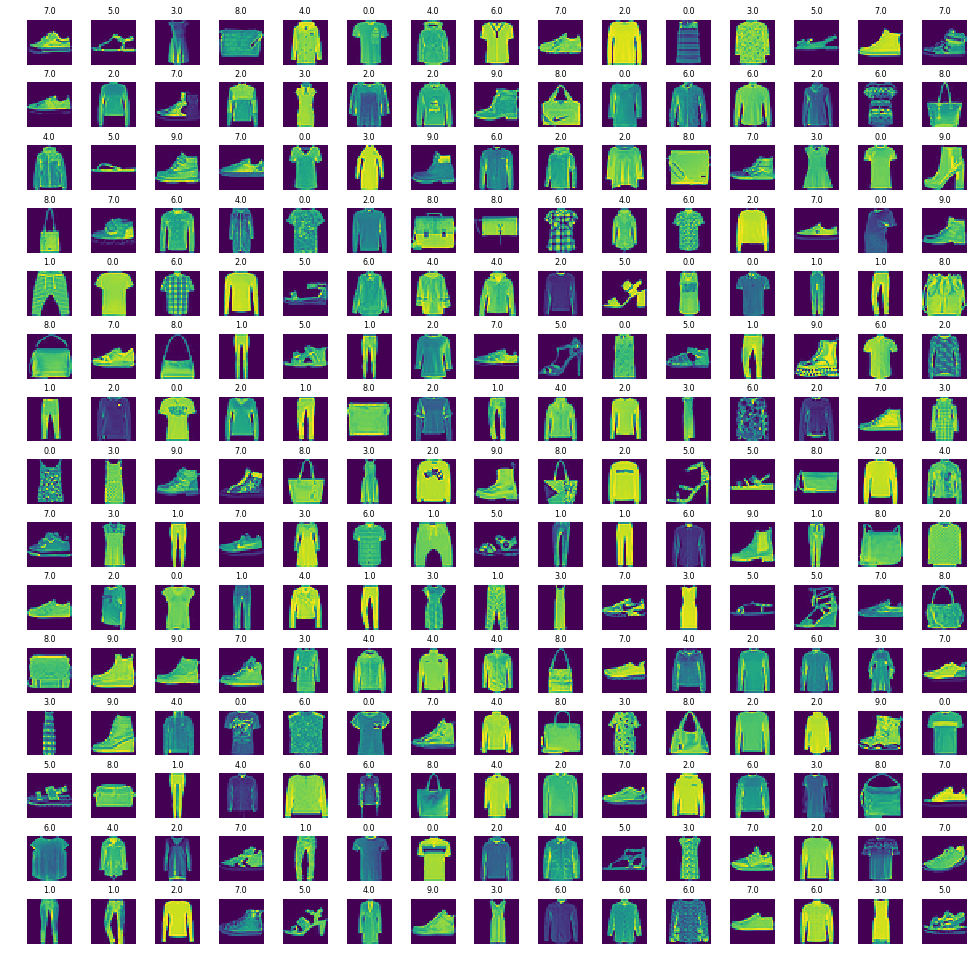

In [14]:
## Viewing all the images and labels in a grid format
## Flatten the matrix into 225 array
## in a loop select a random image to display with selected index

gridW= 15
gridl= 15

fig, axes= plt.subplots(gridl,gridW, figsize=(17, 17))
axes= axes.ravel()
n_training= len(training)

for i in np.arange(0, gridW*gridl):
    index= np.random.randint(0,n_training)
    axes[i].imshow(training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)



### Model Training - CNN
#### Image-----CONVOLUTION--->feature detectors----POOLING-->Pooling Filters----FLATTENING--> Input- Hidden layer- Output 10 target classes

###### Feature Detector- Conv use kernel matrix scan an image and apply filter to obtain a certain effect. Kernels are used for feature selection to select important pixels from image.


In [15]:
X_train = training[:,1:]/255 # Normalization
y_train = training[:,0]

X_test = testing[:,1:]/255 # Normalization
y_test = testing[:,0]

In [16]:
#X_test= testing[:, 1:]/255 
#y_test= testing[:, 0]

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [18]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))



In [19]:
X_train.shape

(48000, 28, 28, 1)

In [20]:
X_test.shape


(10000, 28, 28, 1)

In [21]:
X_validate.shape

(12000, 28, 28, 1)

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### Sequential: build conv-> maxpool-> droupout-> flattening-> Dense( Sequential way)


In [23]:
cnn_model= Sequential()

In [24]:
# 32 kernels, size 3*3, input shape (28,28,1), relu activation
cnn_model.add(Conv2D(64,3,3, input_shape=(28, 28,1), activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  


In [25]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [26]:
cnn_model.add(Flatten())

In [27]:
cnn_model.add(Dense(output_dim=32, activation='relu'))
cnn_model.add(Dense(output_dim=10, activation='sigmoid')) # output 10 targets

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


In [28]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy']) 

In [29]:
epochs= 50

In [30]:
cnn_model.fit(X_train, y_train, batch_size=512, nb_epoch= epochs, verbose=1,validation_data=(X_validate, y_validate))

Instructions for updating:
Use tf.cast instead.


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 20s 409us/step - loss: 0.8581 - acc: 0.7025 - val_loss: 0.4965 - val_acc: 0.8273
Epoch 2/50
48000/48000 [==============================] - 20s 409us/step - loss: 0.4601 - acc: 0.8386 - val_loss: 0.4269 - val_acc: 0.8545
Epoch 3/50
48000/48000 [==============================] - 18s 377us/step - loss: 0.4086 - acc: 0.8584 - val_loss: 0.3929 - val_acc: 0.8648
Epoch 4/50
48000/48000 [==============================] - 16s 340us/step - loss: 0.3768 - acc: 0.8704 - val_loss: 0.3680 - val_acc: 0.8715
Epoch 5/50
48000/48000 [==============================] - 19s 392us/step - loss: 0.3562 - acc: 0.8762 - val_loss: 0.3498 - val_acc: 0.8796
Epoch 6/50
48000/48000 [==============================] - 20s 411us/step - loss: 0.3376 - acc: 0.8826 - val_loss: 0.3417 - val_acc: 0.8797
Epoch 7/50
48000/48000 [==============================] - 20s 414us/step - loss: 0.3228 - acc: 0.8886 - val_loss: 0.

In [31]:
evaluation= cnn_model.evaluate(X_test, y_test)
print('Test accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 126us/step
Test accuracy : 0.912


In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [33]:
predicted_class= cnn_model.predict_classes(X_test)
predicted_class

array([0, 1, 6, ..., 8, 8, 1])

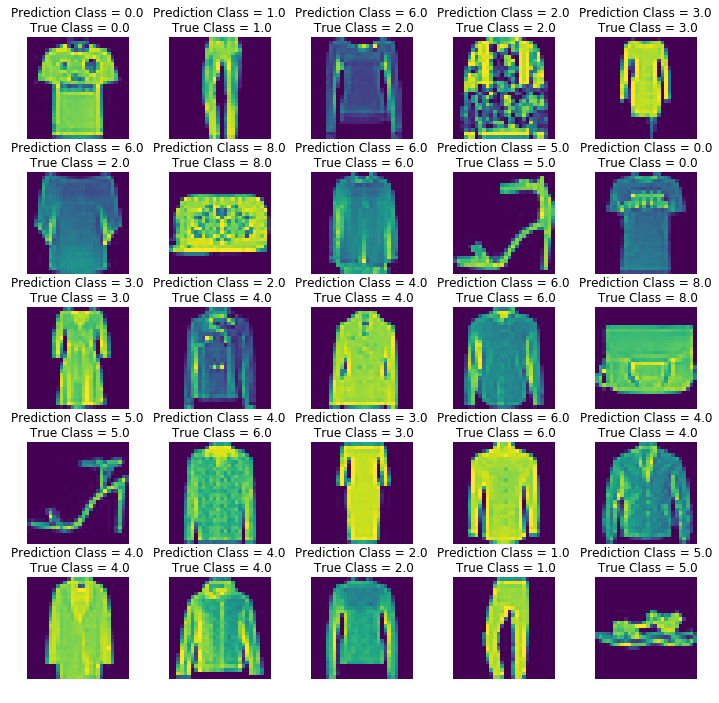

In [34]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # flatten

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_class[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.4)



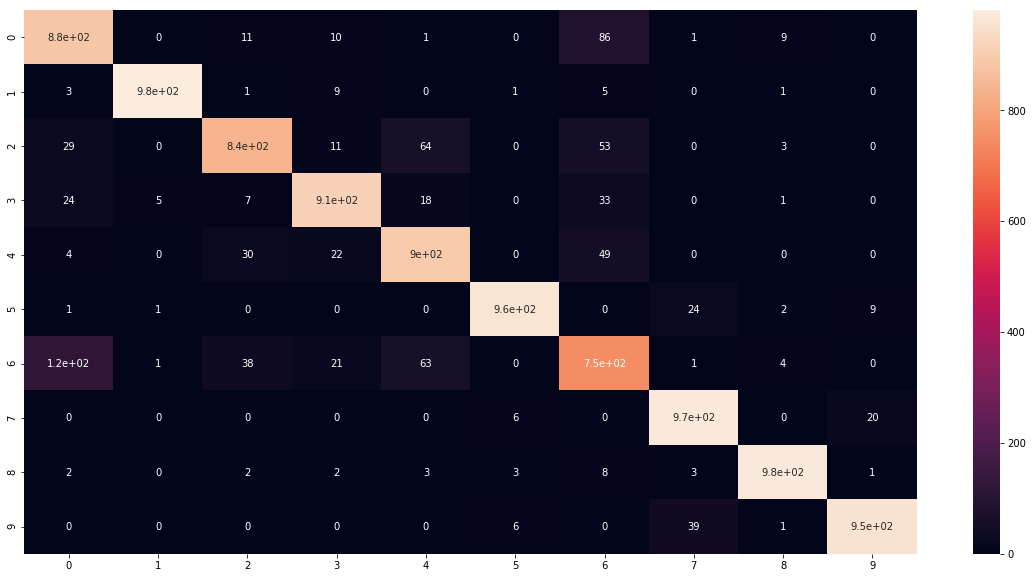

In [35]:
cm = confusion_matrix(y_test, predicted_class)
plt.figure(figsize = (20,10))
sns.heatmap(cm, annot=True)

In [36]:
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_class, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.82      0.88      0.85      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.90      0.84      0.87      1000
     Class 3       0.92      0.91      0.92      1000
     Class 4       0.86      0.90      0.88      1000
     Class 5       0.98      0.96      0.97      1000
     Class 6       0.76      0.75      0.75      1000
     Class 7       0.93      0.97      0.95      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.97      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

